In [1]:
# 1. Drive bağlama ve kütüphane yükleme
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [2]:

import os
src = "/content/drive/MyDrive/SARscope"
dst = "/content"
os.makedirs(dst, exist_ok=True)

!cp -r $src $dst

In [3]:
yaml_content = """
train: /content/SARscope/train
val: /content/SARscope/valid
test: /content/SARscope/test

nc: 1
names: ['ship']
"""

with open("/content/data.yaml", "w") as f:
    f.write(yaml_content)

print("✅ data.yaml oluşturuldu:", "/content/data.yaml")



✅ data.yaml oluşturuldu: /content/data.yaml


In [4]:
!pip install ultralytics wandb

import wandb
from ultralytics import YOLO

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 119.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 91.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 80.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12

In [5]:
# 1️⃣ wandb giriş
wandb.login()  # İlk seferde tarayıcıdan giriş ister

<IPython.core.display.Javascript object>

wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: emreberkdegirmenci (emreberkdegirmenci-k-r-kkale-niversitesi) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


True

In [6]:
wandb.init(project="Sar Gemı tespıtı", entity="emreberkdegirmenci-k-r-kkale-niversitesi")

In [7]:
from ultralytics import YOLO

model = YOLO("yolo11n.pt")  # Bu satırda model otomatik indiriliyor


In [10]:
from ultralytics import YOLO

# Drive'daki en son ağırlığı yükle
model = YOLO("/content/drive/MyDrive/sar_ship_yolov11/exp12/weights/last.pt")

# Eğitim kaldığı yerden devam etsin
model.train(
    data="/content/data.yaml",
    epochs=10,           # Toplam epoch sayısı (kalan epochları yazabilirsin)
    imgsz=640,
    batch=16,
    project="/content/drive/MyDrive/sar_ship_yolov11",
    name="exp1",
    save=True,
    save_period=1,
    resume=True          # ✅ kaldığı yerden devam için
)



Ultralytics 8.3.178 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (AMD EPYC 7B12)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=/content/drive/MyDrive/sar_ship_yolov11/exp12/weights/last.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=exp12, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, p

train: Scanning /content/SARscope/train/labels.cache... 4716 images, 1 backgrounds, 0 corrupt: 100%|██████████| 4717/4717 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1820.2±698.3 MB/s, size: 41.4 KB)



val: Scanning /content/SARscope/valid/labels.cache... 1346 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1346/1346 [00:00<?, ?it/s]

Plotting labels to /content/drive/MyDrive/sar_ship_yolov11/exp12/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Resuming training /content/drive/MyDrive/sar_ship_yolov11/exp12/weights/last.pt from epoch 7 to 10 total epochs
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to /content/drive/MyDrive/sar_ship_yolov11/exp12
Starting training for 10 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10         0G      1.239     0.8135      1.041         39        640: 100%|██████████| 295/295 [43:29<00:00,  8.85s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [05:32<00:00,  7.73s/it]

                   all       1346       3781      0.855      0.746      0.836      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10         0G      1.202     0.7691      1.019         34        640: 100%|██████████| 295/295 [46:33<00:00,  9.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [05:17<00:00,  7.39s/it]

                   all       1346       3781        0.9      0.741      0.854      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10         0G      1.173     0.7251      1.008         19        640: 100%|██████████| 295/295 [44:51<00:00,  9.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [05:16<00:00,  7.37s/it]

                   all       1346       3781      0.883      0.767       0.86       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10         0G      1.129     0.6928     0.9883         15        640: 100%|██████████| 295/295 [45:46<00:00,  9.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [05:02<00:00,  7.03s/it]

                   all       1346       3781      0.896      0.769      0.869      0.581



4 epochs completed in 3.365 hours.
Optimizer stripped from /content/drive/MyDrive/sar_ship_yolov11/exp12/weights/last.pt, 5.5MB
Optimizer stripped from /content/drive/MyDrive/sar_ship_yolov11/exp12/weights/best.pt, 5.5MB

Validating /content/drive/MyDrive/sar_ship_yolov11/exp12/weights/best.pt...
Ultralytics 8.3.178 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (AMD EPYC 7B12)
YOLO11n summary (fused): 100 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [03:57<00:00,  5.52s/it]


                   all       1346       3781      0.896      0.768      0.869      0.581
Speed: 3.3ms preprocess, 167.9ms inference, 0.0ms loss, 0.4ms postprocess per image
Results saved to /content/drive/MyDrive/sar_ship_yolov11/exp12


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x79b768101e90>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [11]:
# Eğitim sonrası test
metrics = model.val(
    data="/content/data.yaml",
    split="test",
    imgsz=640,
    batch=16,
    verbose=True
)

print("\n📊 Test Sonuçları:", metrics)

Ultralytics 8.3.178 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (AMD EPYC 7B12)
YOLO11n summary (fused): 100 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.1±0.0 ms, read: 68.5±105.9 MB/s, size: 83.9 KB)


val: Scanning /content/SARscope/test/labels... 672 images, 0 backgrounds, 0 corrupt: 100%|██████████| 672/672 [00:01<00:00, 336.24it/s]

val: New cache created: /content/SARscope/test/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 42/42 [01:47<00:00,  2.56s/it]


                   all        672       2014      0.886      0.753      0.848      0.558
Speed: 1.2ms preprocess, 153.7ms inference, 0.0ms loss, 0.4ms postprocess per image
Results saved to /content/drive/MyDrive/sar_ship_yolov11/exp122

📊 Test Sonuçları: ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x79b7556dfe50>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029

In [ ]:
import os
import shutil

# Mevcut veri setinin yolu
dataset_root = "/content/drive/MyDrive/SARscope"

# İşlem yapılacak splitler
splits = ["train", "valid", "test"]

for split in splits:
    split_path = os.path.join(dataset_root, split)

    if not os.path.exists(split_path):
        print(f"⚠️ {split} klasörü bulunamadı, atlanıyor.")
        continue

    # images ve labels klasörlerini oluştur
    images_dir = os.path.join(split_path, "images")
    labels_dir = os.path.join(split_path, "labels")
    os.makedirs(images_dir, exist_ok=True)
    os.makedirs(labels_dir, exist_ok=True)

    # Mevcut dosyaları tara
    for file in os.listdir(split_path):
        file_path = os.path.join(split_path, file)

        # Görsel dosyaları
        if file.lower().endswith((".jpg", ".jpeg", ".png")):
            shutil.move(file_path, os.path.join(images_dir, file))

        # Etiket dosyaları
        elif file.lower().endswith(".txt"):
            shutil.move(file_path, os.path.join(labels_dir, file))

    print(f"✅ {split} düzenlendi: images -> {images_dir}, labels -> {labels_dir}")


✅ train düzenlendi: images -> /content/drive/MyDrive/SARscope/train/images, labels -> /content/drive/MyDrive/SARscope/train/labels
✅ valid düzenlendi: images -> /content/drive/MyDrive/SARscope/valid/images, labels -> /content/drive/MyDrive/SARscope/valid/labels
✅ test düzenlendi: images -> /content/drive/MyDrive/SARscope/test/images, labels -> /content/drive/MyDrive/SARscope/test/labels



image 1/1 /content/SARscope/test/images/p0012_4200_5000_4200_5000_png.rf.2a604389297ab3fc99624671515503c7.jpg: 640x640 1 ship, 219.3ms
Speed: 1.9ms preprocess, 219.3ms inference, 6.1ms postprocess per image at shape (1, 3, 640, 640)


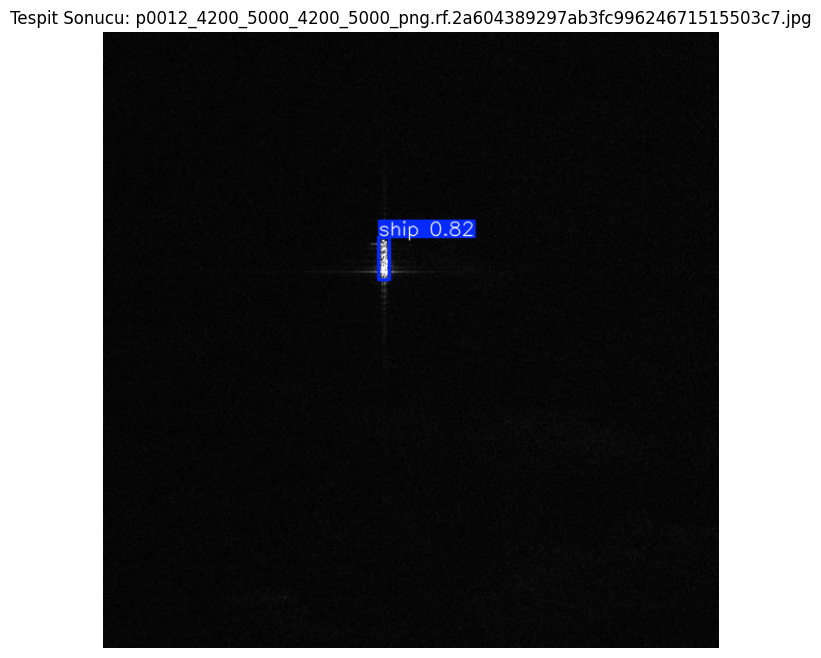


image 1/1 /content/SARscope/test/images/p0108_0_800_8400_9200_png.rf.99eb5641567a90529c0839993ab60dc4.jpg: 640x640 2 ships, 147.4ms
Speed: 2.5ms preprocess, 147.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


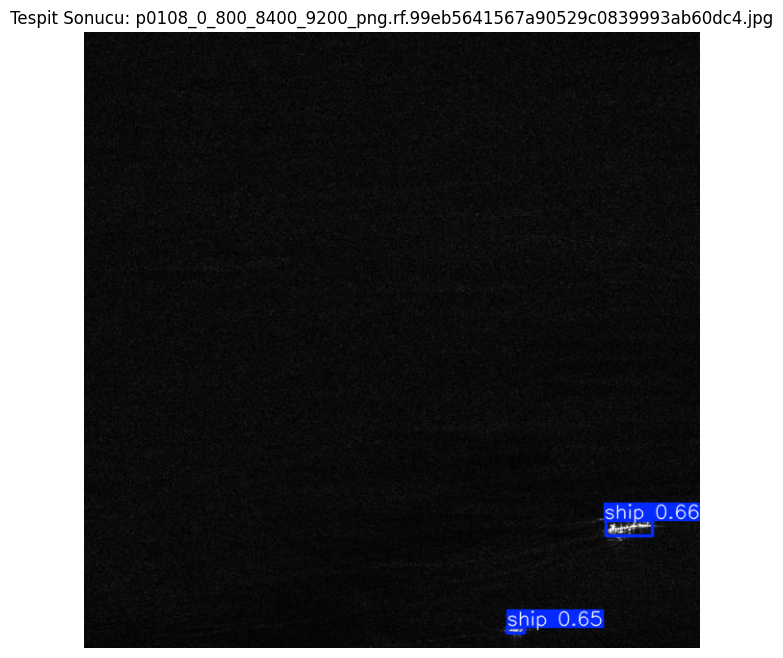


image 1/1 /content/SARscope/test/images/p0074_0_800_1800_2600_png.rf.0cf91240304458d7cb15e57f11f48d94.jpg: 640x640 1 ship, 148.0ms
Speed: 2.2ms preprocess, 148.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


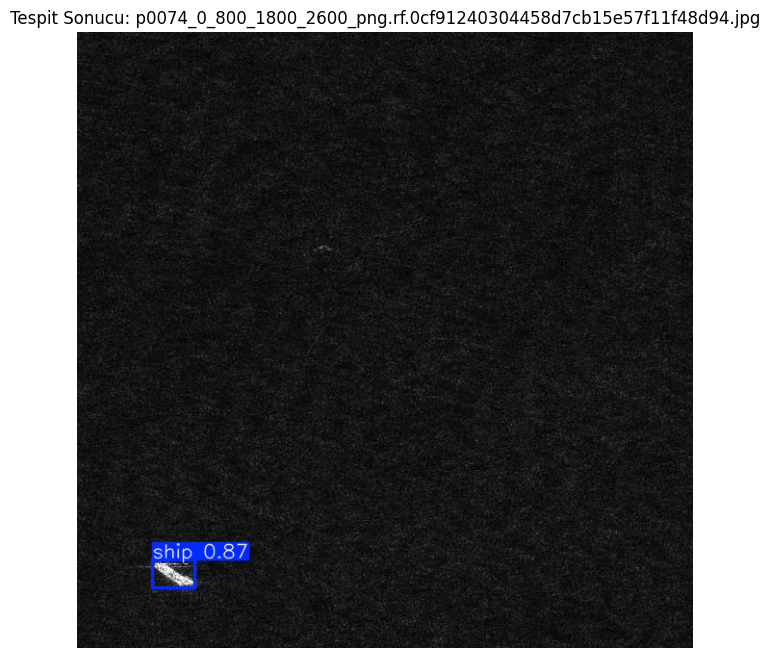


image 1/1 /content/SARscope/test/images/p0113_3600_4400_600_1400_png.rf.b172b3301aa12dd027a920ac76076273.jpg: 640x640 (no detections), 176.2ms
Speed: 5.4ms preprocess, 176.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


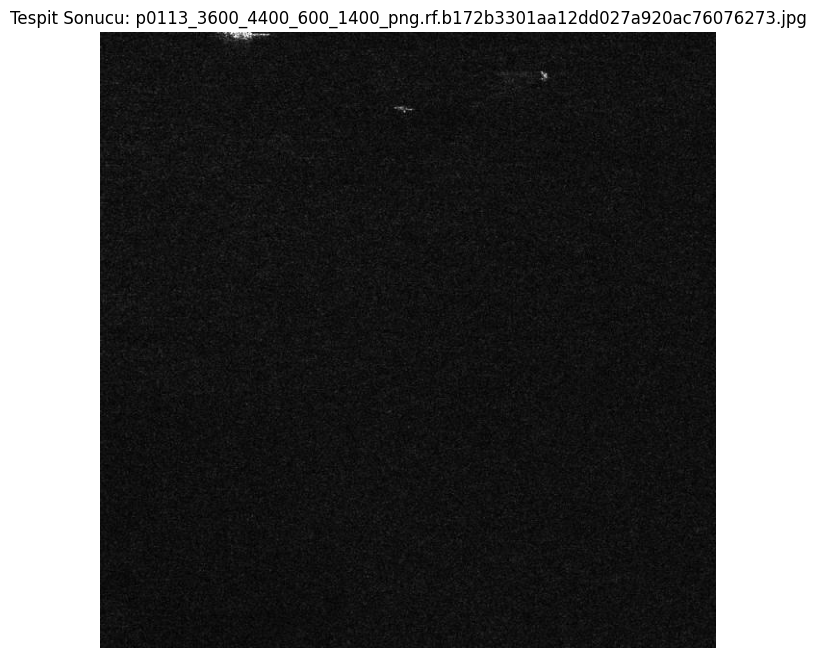


image 1/1 /content/SARscope/test/images/p0042_1800_2600_7200_8000_png.rf.f9063e393430bc62d96d5a15cc679733.jpg: 640x640 4 ships, 155.3ms
Speed: 2.1ms preprocess, 155.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


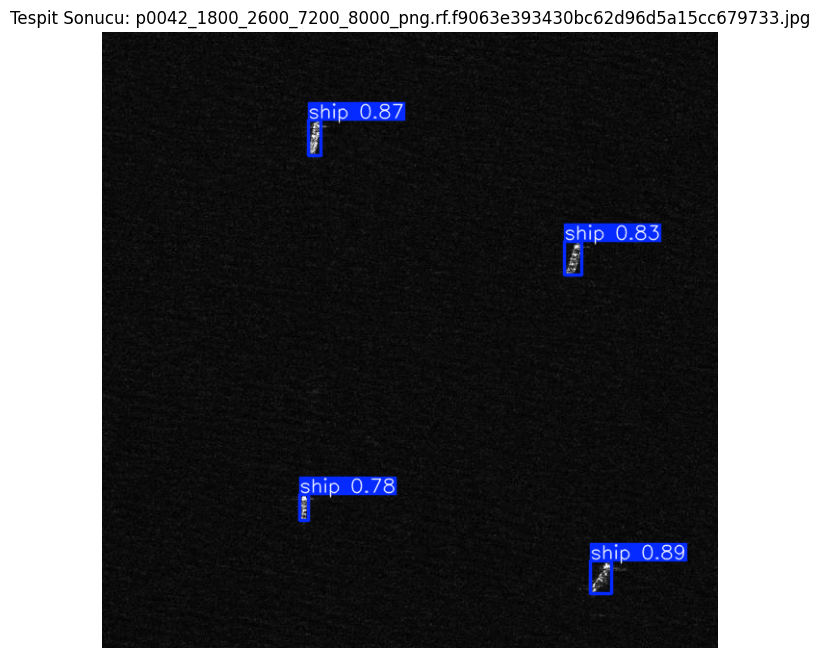

In [13]:
import os
import cv2
from ultralytics import YOLO
from matplotlib import pyplot as plt

# Eğittiğin modeli yükle (örnek: son checkpoint)
model_path = "/content/drive/MyDrive/sar_ship_yolov11/exp12/weights/best.pt"
model = YOLO(model_path)

# Test görsellerinin yolu
test_images_path = "/content/SARscope/test/images"

# İlk 5 görseli gösterelim
image_files = [f for f in os.listdir(test_images_path) if f.lower().endswith((".jpg", ".png", ".jpeg"))][:5]

for img_name in image_files:
    img_path = os.path.join(test_images_path, img_name)

    # Model ile tahmin
    results = model(img_path, conf=0.5)

    # Tahmin edilmiş görseli çiz
    annotated_img = results[0].plot()  # BGR format

    # BGR -> RGB çevir ve göster
    plt.figure(figsize=(8, 8))
    plt.imshow(cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.title(f"Tespit Sonucu: {img_name}")
    plt.show()


In [15]:
import pandas as pd
import os

results_csv = "/content/drive/MyDrive/sar_ship_yolov11/exp12/results.csv"

if os.path.exists(results_csv):
    df = pd.read_csv(results_csv)
    print("Son 10 epoch sonucu:\n", df.tail())
else:
    print(f"{results_csv} bulunamadı.")


Son 10 epoch sonucu:
    epoch      time  train/box_loss  train/cls_loss  train/dfl_loss  \
5      6  33652.10         1.26760         0.83381         1.04028   
6      7   2942.34         1.23864         0.81354         1.04066   
7      8   6053.83         1.20161         0.76909         1.01853   
8      9   9063.94         1.17323         0.72513         1.00754   
9     10  12113.00         1.12906         0.69276         0.98831   

   metrics/precision(B)  metrics/recall(B)  metrics/mAP50(B)  \
5               0.87026            0.74134           0.84008   
6               0.85482            0.74557           0.83583   
7               0.89972            0.74134           0.85417   
8               0.88271            0.76673           0.85983   
9               0.89553            0.76884           0.86940   

   metrics/mAP50-95(B)  val/box_loss  val/cls_loss  val/dfl_loss    lr/pg0  \
5              0.53791       1.15987       0.73546       1.03300  0.001010   
6              0

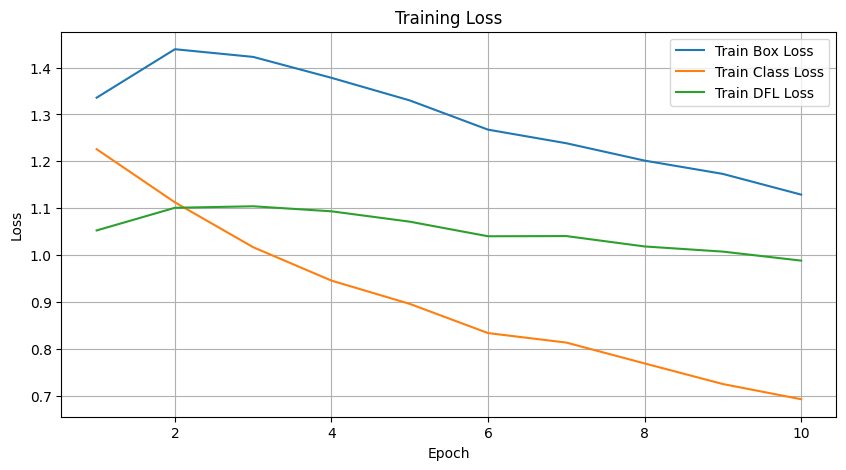

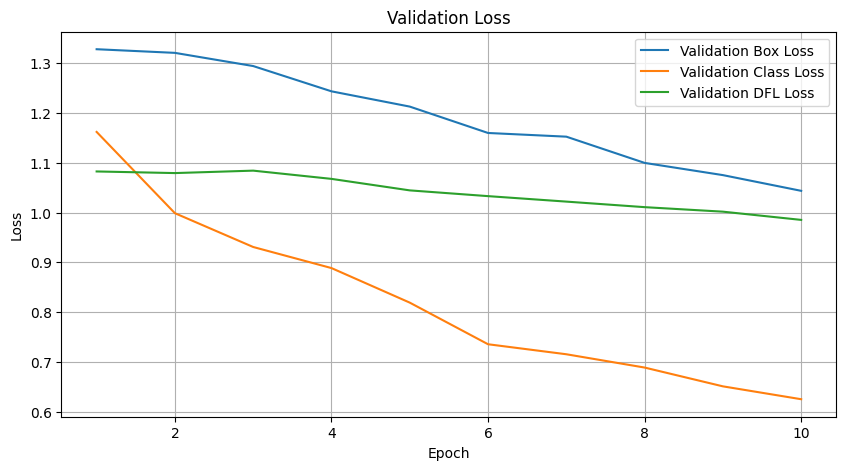

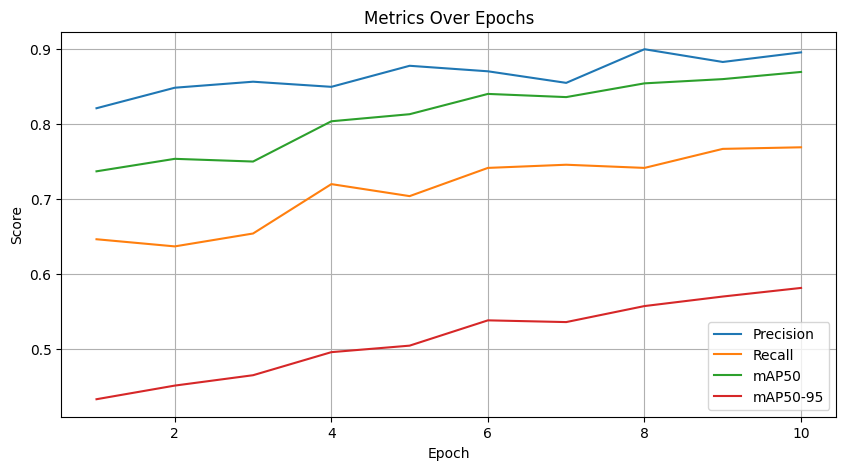

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

# Diyelim ki csv'den okudun, df isimli DataFrame var
# Senin verdiğin df çıktıdaki kolonlar:
# epoch, train/box_loss, train/cls_loss, train/dfl_loss, metrics/precision(B), metrics/recall(B), metrics/mAP50(B), metrics/mAP50-95(B), val/box_loss, val/cls_loss, val/dfl_loss

# Epoch numaraları
epochs = df['epoch']

# 1. Train Lossları
plt.figure(figsize=(10, 5))
plt.plot(epochs, df['train/box_loss'], label='Train Box Loss')
plt.plot(epochs, df['train/cls_loss'], label='Train Class Loss')
plt.plot(epochs, df['train/dfl_loss'], label='Train DFL Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()
plt.grid(True)
plt.show()

# 2. Validation Lossları
plt.figure(figsize=(10, 5))
plt.plot(epochs, df['val/box_loss'], label='Validation Box Loss')
plt.plot(epochs, df['val/cls_loss'], label='Validation Class Loss')
plt.plot(epochs, df['val/dfl_loss'], label='Validation DFL Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

# 3. Metrikler: Precision, Recall, mAP50, mAP50-95
plt.figure(figsize=(10, 5))
plt.plot(epochs, df['metrics/precision(B)'], label='Precision')
plt.plot(epochs, df['metrics/recall(B)'], label='Recall')
plt.plot(epochs, df['metrics/mAP50(B)'], label='mAP50')
plt.plot(epochs, df['metrics/mAP50-95(B)'], label='mAP50-95')
plt.xlabel('Epoch')
plt.ylabel('Score')
plt.title('Metrics Over Epochs')
plt.legend()
plt.grid(True)
plt.show()


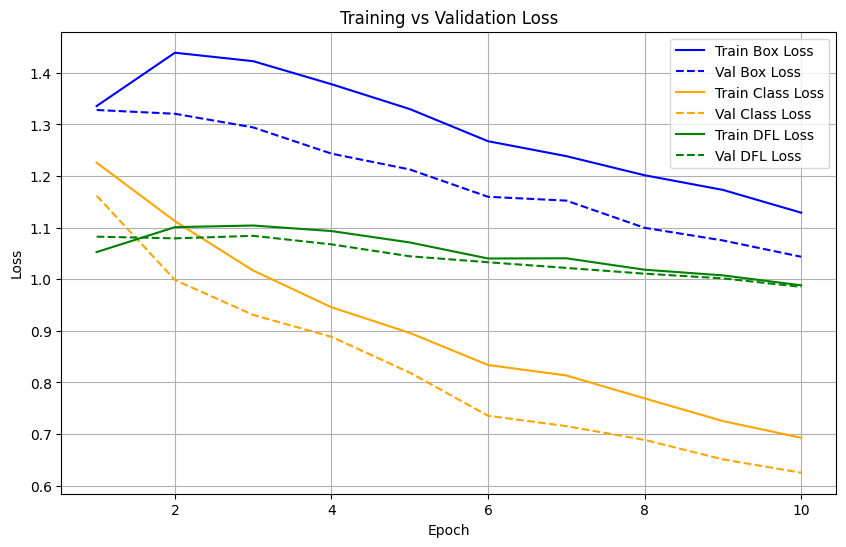

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# results.csv dosyasının yolu (Drive içinden al)
csv_path = "/content/drive/MyDrive/sar_ship_yolov11/exp12/results.csv"

# CSV'yi oku
df = pd.read_csv(csv_path)

# Grafik boyutu
plt.figure(figsize=(10,6))

# Eğitim ve validasyon box loss
plt.plot(df.index + 1, df['train/box_loss'], label='Train Box Loss', color='blue')
plt.plot(df.index + 1, df['val/box_loss'], label='Val Box Loss', color='blue', linestyle='--')

# Eğitim ve validasyon class loss
plt.plot(df.index + 1, df['train/cls_loss'], label='Train Class Loss', color='orange')
plt.plot(df.index + 1, df['val/cls_loss'], label='Val Class Loss', color='orange', linestyle='--')

# Eğitim ve validasyon DFL loss
plt.plot(df.index + 1, df['train/dfl_loss'], label='Train DFL Loss', color='green')
plt.plot(df.index + 1, df['val/dfl_loss'], label='Val DFL Loss', color='green', linestyle='--')

# Başlık ve etiketler
plt.title("Training vs Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()
